## Pseudo-Inverse approach and linear regression

In [1]:
# import the needed libs
import numpy as np # For different array operations
import pandas as pd # For dealing with CSV files and creating DataFrames
import matplotlib.pyplot as plt # For plotting the graphs
from sklearn.model_selection import train_test_split # For splitting the data
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Different loss funcitons

Loading Telecom Traffic Data from the CSV file.

In [2]:
df = pd.read_csv('../Traffic Data Applied Linear Algebra.csv')
df = df[["Season", "DayOfWeek", "Period", "PricePerGB", "Arrivals"]]
df = df.sort_values(by=["Season" ,"DayOfWeek", "Period"], ascending=True)
df = df.reset_index(drop=True)
df.head()

,Season,DayOfWeek,Period,PricePerGB,Arrivals
0,1,1,3,1,45
1,1,1,3,2,22
2,1,1,3,2,35
3,1,1,4,2,40
4,1,1,6,1,53


Splitting the data into train/test.

In [3]:
features = ["Season", "DayOfWeek", "Period", "PricePerGB"]
target = ["Arrivals"]
X = df[features]
Y = df[target]

train_X, test_X, train_Y, tset_Y = train_test_split(X, Y, test_size=0.20, shuffle=False)

Here is the core of the model, calculating the Pseudo-Inverse and getting fitted coefficients.

In [4]:
X_pinv = np.linalg.pinv(train_X)
coefficients = np.dot(X_pinv, train_Y)
print(coefficients)

[[ 7.82588065]
 [ 3.88017453]
 [ 0.73373638]
 [-2.07472021]]


Now use the coefficients to compute the dot product with the test split to obtain the predicted values $\hat{y}$ ($A x = \hat{y}$) -> $A$ is the split set values and $x$ is the coefficients we calculated above.

In [5]:
pred_Y = np.dot(test_X, coefficients)
print(pred_Y.flatten()[:5])

[51.79036802 41.60306234 39.52834213 43.80427149 43.80427149]


Calculate the next 100 days inputs

In [6]:
number_of_periods_per_day = 24
number_of_next_periods = 100
i = 0
day_of_week = 0
day_of_week_arr = []
periods_arr = []
next_season = 1

while i < number_of_next_periods:
    day_of_week = (day_of_week + 1) % 7
    for period in range(1 ,number_of_periods_per_day+1):
        day_of_week_arr.append(day_of_week)
        periods_arr.append(period)
        i = i + 1
        if i >= 100:
            break



# 4. Random PricePerGB (1 or 2)
Season = [next_season for i in range(100)]
price_per_gb = np.random.choice([1, 2], size=number_of_next_periods)

# Build df
next_100_days_df = pd.DataFrame({
    "Season": Season,
    "DayOfWeek": day_of_week_arr,
    "Period": periods_arr,
    "PricePerGB": price_per_gb
}).sort_values(by=["DayOfWeek", "Period"], ascending=True)

next_100_days_df.head()

,Season,DayOfWeek,Period,PricePerGB
0,1,1,1,1
1,1,1,2,2
2,1,1,3,1
3,1,1,4,2
4,1,1,5,1


Now let's predict the next 100 days

In [7]:
next_100_days_Y = np.dot(next_100_days_df, coefficients)
print(next_100_days_Y.flatten()[:5])

[10.36507134  9.02408751 11.83254411 10.49156028 13.30001687]


Plotting all the data

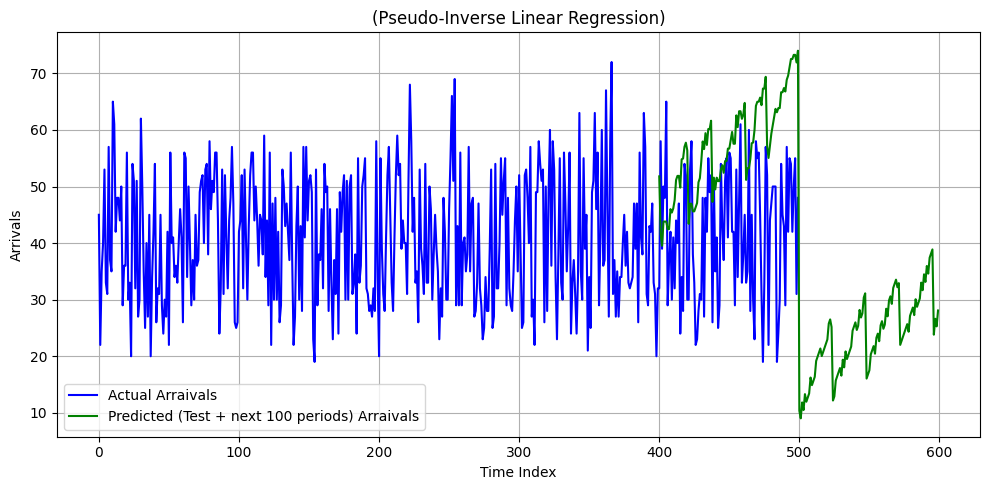

In [8]:
all_actual_data = np.concatenate((train_Y.values, tset_Y.values))
all_predicted = np.concatenate((pred_Y.flatten(), next_100_days_Y.flatten()))

# Create a continuous time axis
actual_data_index = np.arange(len(all_actual_data))
predected_data_index = np.arange(len(train_Y), len(train_Y) + len(all_predicted))

plt.figure(figsize=(10, 5))

# --- Plot sections ---

# 1. Plot all actual
plt.plot(actual_data_index, all_actual_data, label="Actual Arraivals", color="blue")

# 3. Plot predictions on top of test
plt.plot(predected_data_index, all_predicted, label="Predicted (Test + next 100 periods) Arraivals", color="green")

# Labels, title, etc.
plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Plot only the test part to see our predictions accuracy

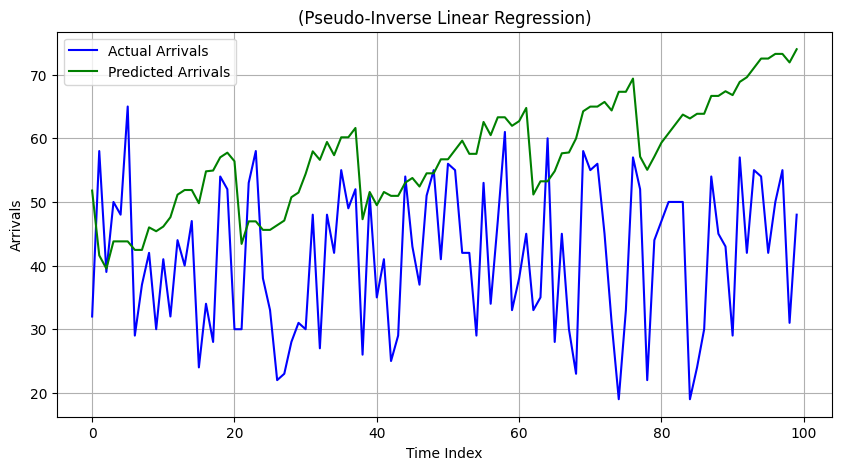

In [9]:
actual = tset_Y.values.flatten()
predicted = pred_Y.flatten()

plt.figure(figsize=(10, 5))

# Plot actual values
plt.plot(actual, label="Actual Arrivals", color="blue")

# Plot predicted values
plt.plot(predicted, label="Predicted Arrivals", color='green')

plt.title("(Pseudo-Inverse Linear Regression)")
plt.xlabel("Time Index")
plt.ylabel("Arrivals")
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Convert to flat arrays
y_true = tset_Y.values.flatten()
y_pred_flat = pred_Y.flatten()

# --- Error metrics ---
mse = mean_squared_error(y_true, y_pred_flat)
rmse = np.sqrt(mse)

# --- Print ---
print("Model Evaluation:")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")


Model Evaluation:
RMSE (Root Mean Squared Error): 20.1004
